In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/train.csv')
final_test_data = pd.read_csv('datasets/test.csv')

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# dropping column with highest null values
def drop_nan(df):
    for col in df.columns:
        if df[col].isnull().sum() > 600:
            df.drop(columns=[col], inplace=True)
    return df.shape
drop_nan(df)

(1460, 75)

In [5]:
# retrieving the count of null values in each column
column_with_null_values = []
def check_null(df):
    for col in df.columns:
        if df[col].isnull().any():
            column_with_null_values.append(col)
            print(f"{col} has null {df[col].isnull().sum()} values")
check_null(df)


LotFrontage has null 259 values
MasVnrArea has null 8 values
BsmtQual has null 37 values
BsmtCond has null 37 values
BsmtExposure has null 38 values
BsmtFinType1 has null 37 values
BsmtFinType2 has null 38 values
Electrical has null 1 values
GarageType has null 81 values
GarageYrBlt has null 81 values
GarageFinish has null 81 values
GarageQual has null 81 values
GarageCond has null 81 values


In [6]:
# getting all different types of features
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
cat_features = df.select_dtypes(exclude=[np.number]).columns.tolist()
int_features = df.select_dtypes(include=[np.int64]).columns.tolist()
float_features = df.select_dtypes(include=[np.float64]).columns.to_list()
print(f'num_features = {len(num_features)}')
print(f'cat_features = {len(cat_features)}')
print(f'int_features = {len(int_features)}')
print(f'float_features = {len(float_features)}')

num_features = 38
cat_features = 37
int_features = 35
float_features = 3


In [7]:
# filling null in numerical features
def fill_numerical_nans(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        if df[col].isnull().any():
            skewness = df[col].skew()
            if abs(skewness) < 0.5:
                fill_value = df[col].mean()
            else:
                fill_value = df[col].median()
            df[col] = df[col].fillna(fill_value)
    return df
fill_numerical_nans(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [8]:
def fill_categorical_nans(df):
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        if df[col].isnull().any():
            mode = df[col].mode()
            fill_value = mode[0] if not mode.empty else "Unknown"
            df[col] = df[col].fillna(fill_value)
    return df
fill_categorical_nans(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [9]:
column_with_null_values = []
def check_null(df):
    for col in df.columns:
        if df[col].isnull().any():
            column_with_null_values.append(col)
            print(f"{col} has null {df[col].isnull().sum()} values")
check_null(df)

<Axes: >

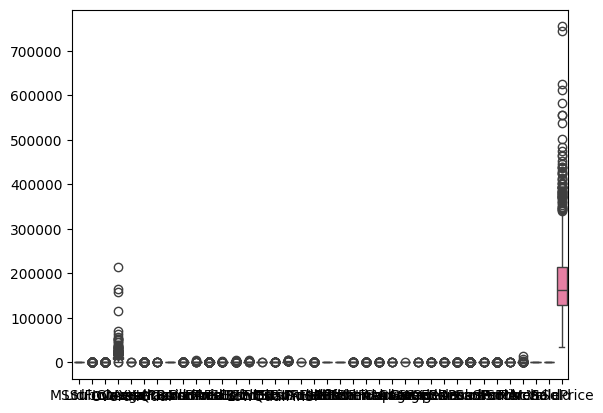

In [10]:
sns.boxplot(df)

In [11]:
# checking correlation
df[num_features].corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [12]:
def drop_high_corr_features(df, threshold=0.85):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(columns=to_drop), to_drop

drop_high_corr_features(df[num_features], 0.8)

(        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
 0        1          60         65.0     8450            7            5   
 1        2          20         80.0     9600            6            8   
 2        3          60         68.0    11250            7            5   
 3        4          70         60.0     9550            7            5   
 4        5          60         84.0    14260            8            5   
 ...    ...         ...          ...      ...          ...          ...   
 1455  1456          60         62.0     7917            6            5   
 1456  1457          20         85.0    13175            6            6   
 1457  1458          70         66.0     9042            7            9   
 1458  1459          20         68.0     9717            5            6   
 1459  1460          20         75.0     9937            5            6   
 
       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
 0          2003       

In [13]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [14]:
df = df.drop(columns=['Id'])
df.shape

(1460, 74)

In [15]:
# separating dependent and independent variables
y = df['SalePrice']
X = df.drop(['SalePrice'], axis=1)

In [16]:
# creating column transformer with 3 types of transformers
numerical_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']] # type: ignore
categorical_features = [col for col in X.columns if X[col].dtype == "object"]
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
    ],
    remainder='drop'
)
X = preprocessor.fit_transform(X)

In [17]:
X.shape

(1460, 229)

In [18]:
pd.DataFrame(X).head() # type: ignore

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...


In [19]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1095, 229), (365, 229), (1095,), (365,))

In [20]:
pd.DataFrame(X_train).head()

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...


In [21]:
# model training and model selection 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
# creating a function to evaluate the model
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    return mae, mse, rmse, r2

In [23]:
# Beginning with model training and selection
models = {
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XG-boost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Ada Boosting': AdaBoostRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    mae1, mse1, rmse1, r21 = evaluate_model(y_test, y_test_pred) # test set evaluation
    mae2, mse2, rmse2, r22 = evaluate_model(y_train, y_train_pred) # train set evaluation
    print(f"Model: {list(models.keys())[i]}")
    print('test set evaluation')
    print(f"mean_absolute_error : {mae1}\nmean_squared_error : {mse1}\nroot_mean_squared_error : {rmse1}\nr2_score : {r21}")
    print('-' * 50)
    print('train set evaluation')
    print(f"mean_absolute_error : {mae2}\nmean_squared_error : {mse2}\nroot_mean_squared_error : {rmse2}\nr2_score : {r22}")
    print("=" * 50)
    print("\n")

Model: Random Forest
test set evaluation
mean_absolute_error : 16893.287534246574
mean_squared_error : 747258943.6575339
root_mean_squared_error : 27336.03745347035
r2_score : 0.8933296249923481
--------------------------------------------------
train set evaluation
mean_absolute_error : 6832.500931506849
mean_squared_error : 162618338.98837405
root_mean_squared_error : 12752.18957624039
r2_score : 0.97321587604117


Model: Linear Regression
test set evaluation
mean_absolute_error : 18865.43574250223
mean_squared_error : 2200591440.267704
root_mean_squared_error : 46910.4619489907
r2_score : 0.6858680432474498
--------------------------------------------------
train set evaluation
mean_absolute_error : 13180.334280351432
mean_squared_error : 410077397.89948964
root_mean_squared_error : 20250.36784602911
r2_score : 0.9324580245599505


Model: Ridge Regression
test set evaluation
mean_absolute_error : 19181.665141914702
mean_squared_error : 827446364.9327811
root_mean_squared_error : 287

In [24]:
# initializing the params for hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

In [25]:
# models list for hyperparameter tuning
models = [
    ('Gradient Boosting',GradientBoostingRegressor(), gb_params),
    ('Random Forest',RandomForestRegressor(), rf_params),
    ('XG-boost', XGBRegressor(), xgb_params)
]

In [26]:
# Hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
model_best_params = {}
for name, model, params in models:
    random_search = RandomizedSearchCV(model, params, cv=5, n_iter=10, n_jobs=-1, random_state=42, verbose=1)
    random_search.fit(X_train, y_train)
    best_params = random_search.best_params_
    model_best_params[name] = best_params
# Displaying the best parameters for each model
for name in model_best_params:
    print(f'------------ Best parameters for {name} model ------------')
    print(model_best_params[name])
    print("\n")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
------------ Best parameters for Gradient Boosting model ------------
{'subsample': 0.7, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.05}


------------ Best parameters for Random Forest model ------------
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


------------ Best parameters for XG-boost model ------------
{'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}




In [27]:
# Retraining the best model with the best parameters
best_models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, min_samples_split=2, max_features='log2', max_depth=30, bootstrap=False, n_jobs=-1, min_samples_leaf=1),
    'Gradient Boosting':GradientBoostingRegressor(subsample=0.7, n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features='log2', max_depth=5, learning_rate=0.05),
    'XG-boost': XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=300, gamma=0.1, subsample=0.6, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=1.5, n_jobs=-1, min_child_weight=5)
}

for i in range(len(list(best_models))):
    model = list(best_models.values())[i]
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    mae1, mse1, rmse1, r21 = evaluate_model(y_test, y_test_pred) # test set evaluation
    mae2, mse2, rmse2, r22 = evaluate_model(y_train, y_train_pred) # train set evaluation
    print(f"Model: {list(best_models.keys())[i]}")
    print('test set evaluation')
    print(f"mean_absolute_error : {mae1}\nmean_squared_error : {mse1}\nroot_mean_squared_error : {rmse1}\nr2_score : {r21}")
    print('-' * 50)
    print('train set evaluation')
    print(f"mean_absolute_error : {mae2}\nmean_squared_error : {mse2}\nroot_mean_squared_error : {rmse2}\nr2_score : {r22}")
    print("=" * 50)
    print("\n")

Model: Random Forest
test set evaluation
mean_absolute_error : 17746.324977168948
mean_squared_error : 986741508.9577475
root_mean_squared_error : 31412.441945155228
r2_score : 0.8591437577435304
--------------------------------------------------
train set evaluation
mean_absolute_error : 10.808610132637462
mean_squared_error : 1449.9588826875531
root_mean_squared_error : 38.07832562872944
r2_score : 0.9999997611838942


Model: Gradient Boosting
test set evaluation
mean_absolute_error : 17654.290037421448
mean_squared_error : 908030010.942724
root_mean_squared_error : 30133.5363165813
r2_score : 0.8703797356892483
--------------------------------------------------
train set evaluation
mean_absolute_error : 12928.2028617587
mean_squared_error : 329086226.94817406
root_mean_squared_error : 18140.733914265267
r2_score : 0.9457977104516255


Model: XG-boost
test set evaluation
mean_absolute_error : 17164.865234375
mean_squared_error : 804763392.0
root_mean_squared_error : 28368.35194367131

In [28]:
# BEST MODEL BASED ON OVERALL PERFORMANCE
# ---------- XG Boost Model ---------- #

In [29]:
Y = final_test_data['Id']
X_TEST = final_test_data.drop(['Id'], axis=1)
X_TEST.shape

(1459, 79)

In [30]:
# dropping column with highest null values
def drop_nan(df):
    for col in df.columns:
        if df[col].isnull().sum() > 600:
            df.drop(columns=[col], inplace=True)
    return df.shape
drop_nan(X_TEST)

(1459, 73)

In [33]:
numerical1_features = [col for col in X_TEST.columns if X_TEST[col].dtype in ['int64', 'float64']] # type: ignore
categorical1_features = [col for col in X_TEST.columns if X_TEST[col].dtype == "object"] # type: ignore
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical1_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical1_features),
    ],
    remainder='drop'
)
X_TEST = preprocessor1.fit_transform(X_TEST)
X_TEST.shape

(1459, 229)

In [34]:
# Retraining the best model with the best parameters
best_models = {
    'XG-boost': XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=300, gamma=0.1, subsample=0.6, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=1.5, n_jobs=-1, min_child_weight=5)
}

for i in range(len(list(best_models))):
    model = list(best_models.values())[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_TEST)
    output = pd.DataFrame({
        'Id': Y,
        'SalePrice': y_pred
    })
    output.to_csv('submission.csv', index=False)
    print("✅ File saved as 'submission.csv'")
    

✅ File saved as 'submission.csv'
